In [1]:
!pip3 install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.impute import SimpleImputer
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.metrics.cluster import rand_score
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [3]:
from ucimlrepo import fetch_ucirepo 

chronic_kidney_disease = fetch_ucirepo(id=336) 

df = pd.concat([chronic_kidney_disease.data.features, chronic_kidney_disease.data.targets], axis=1)

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


1. Classification Problem Identification: Define and describe a classification problem based on the dataset.

Our goal is to predict whether individuals have Chronic Kidney Disease (CKD) based on various medical predictor variables. This classification problem involves distinguishing between two categories: individuals diagnosed with CKD and those without. We will use a clinical dataset to build a predictive model that can accurately identify these two states based on patient medical data.

2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

In [4]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [5]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [6]:
float64_columns = df.select_dtypes(
    include=['float64']
    ).columns
float64_columns
scaler = StandardScaler()
df[float64_columns] = scaler.fit_transform(df[float64_columns])

In [7]:
cat_columns = df.select_dtypes(
    include=['object']
    ).columns

for col in cat_columns:
    print(df[col].value_counts(normalize=True))

rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64
htn
no     0.630653
yes    0.369347
Name: proportion, dtype: float64
dm
no      0.653266
yes     0.344221
\tno    0.002513
Name: proportion, dtype: float64
cad
no     0.914573
yes    0.085427
Name: proportion, dtype: float64
appet
good    0.794486
poor    0.205514
Name: proportion, dtype: float64
pe
no     0.809524
yes    0.190476
Name: proportion, dtype: float64
ane
no     0.849624
yes    0.150376
Name: proportion, dtype: float64
class
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64


In [8]:
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1,1,0,0,-0.341498,...,0.569881,-0.206202,0.481295,1,2,0,0,0,0,0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1,1,0,0,NaN,...,-0.098536,-0.818559,NaN,0,1,0,0,0,0,0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1,1,0,0,3.473064,...,-0.878356,-0.308261,NaN,0,2,0,1,0,1,0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1,0,1,0,-0.392022,...,-0.766953,-0.580420,-0.788961,1,1,0,1,1,1,0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.432744,-0.376301,-0.104977,0,1,0,0,0,0,0


Here, we performed two data transformation steps:
1. Transformation 1: Standardizing Numerical Features. 

This step Z-transformed the numerical features to make them come from a distribution closer to a standard normal distribution with mean 0 and variance 1. This can improve performance of some classification algorithms, including logistic regression.


2. Transformation 2: Encoding Categorical Features.

This step converted columns containing categorical features into categorical variables within pandas. This is needed so that when we use our pandas dataframe as input to our classification models later, the libraries recognize the variables as categorical, rather than continuous. 


3. Dataset Overview: Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    int8   
 6   pc      400 non-null    int8   
 7   pcc     400 non-null    int8   
 8   ba      400 non-null    int8   
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     400 non-null    int8   
 19  dm      400 non-null    int8   
 20  cad     400 non-null    int8   
 21  appet   400 non-null    int8   
 22  pe

In [10]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,400.00000,400.000000,400.000000,400.000000,3.560000e+02,...,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,...,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,1.330000,0.080000,0.202500,0.187500,0.147500,0.755000
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.93256,0.759089,0.325946,0.251262,1.001407e+00,...,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.506697,0.289499,0.408547,0.397163,0.362038,0.968152
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,...,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,...,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,...,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.00000,1.000000,0.000000,0.000000,1.890038e-01,...,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.00000,1.000000,1.000000,1.000000,4.319341e+00,...,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [11]:
df["class"].value_counts()

class
0    248
2    150
1      2
Name: count, dtype: int64

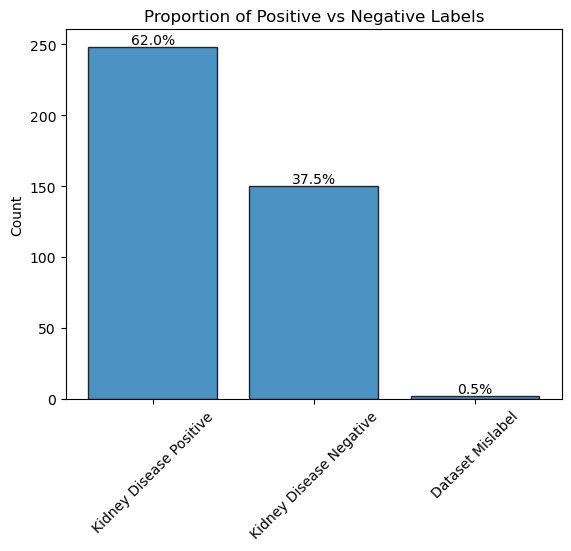

In [12]:
fig, ax = plt.subplots(1, 1)
bar_data = df["class"].value_counts()
ax.bar(range(len(bar_data)), bar_data, edgecolor="black", alpha=0.8)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Kidney Disease Positive", "Kidney Disease Negative", "Dataset Mislabel"], rotation=45)

for i, count in enumerate(bar_data):
    percentage = count / bar_data.sum() * 100
    ax.text(i, count, f"{percentage:.1f}%", ha="center", va="bottom")
ax.set_ylabel("Count")
ax.set_title("Proportion of Positive vs Negative Labels")
plt.show()

#### Visualizing distribution of continuous variables with Kernel Density Estimation

c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

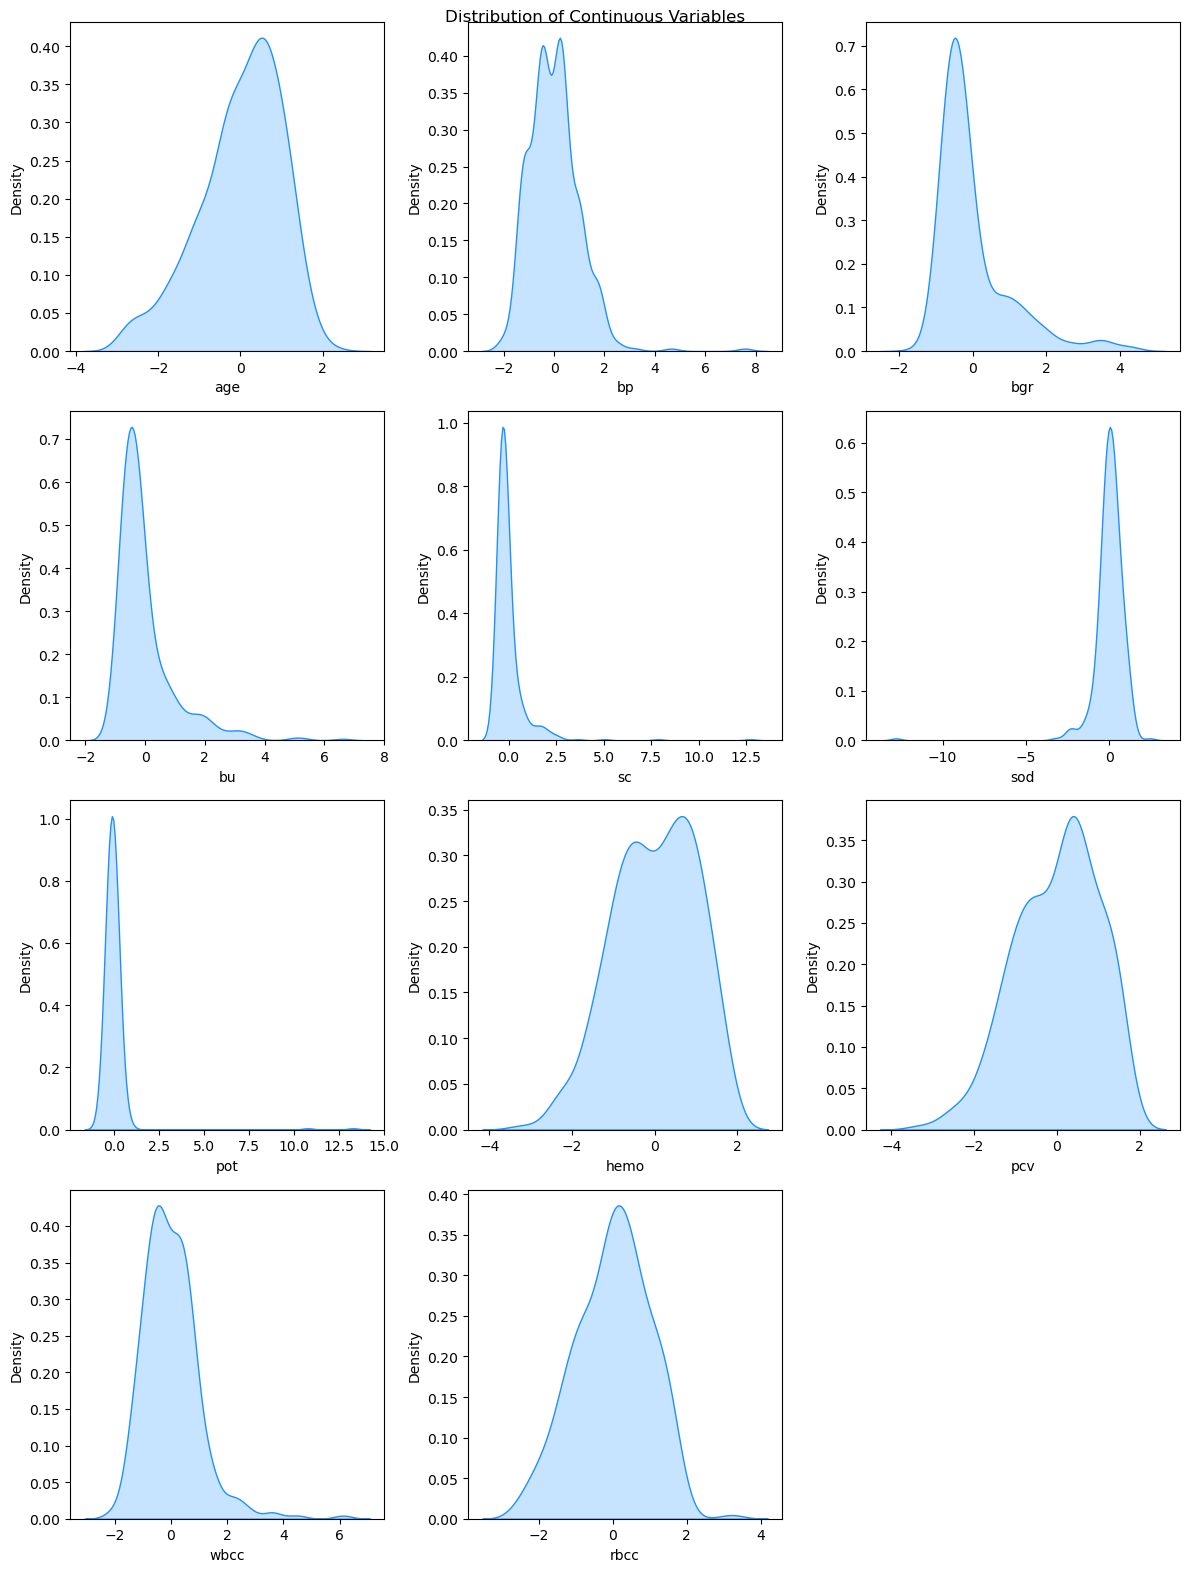

In [13]:
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

num_features = len(num_vars)
num_rows = 4  # Number of rows in the subplot grid
num_cols = 3  # Number of columns in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

for i, cont_feature in enumerate(df[num_vars]):
    row = i // num_cols  # Calculate the row index for the subplot
    col = i % num_cols  # Calculate the column index for the subplot

    ax_kde = axes[row, col]

    # Plot KDE for the feature
    sns.kdeplot(df[cont_feature], ax=ax_kde, fill=True, color="dodgerblue")

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle("Distribution of Continuous Variables")
plt.tight_layout()
plt.show()

c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\viran\anaconda3\envs\proj02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

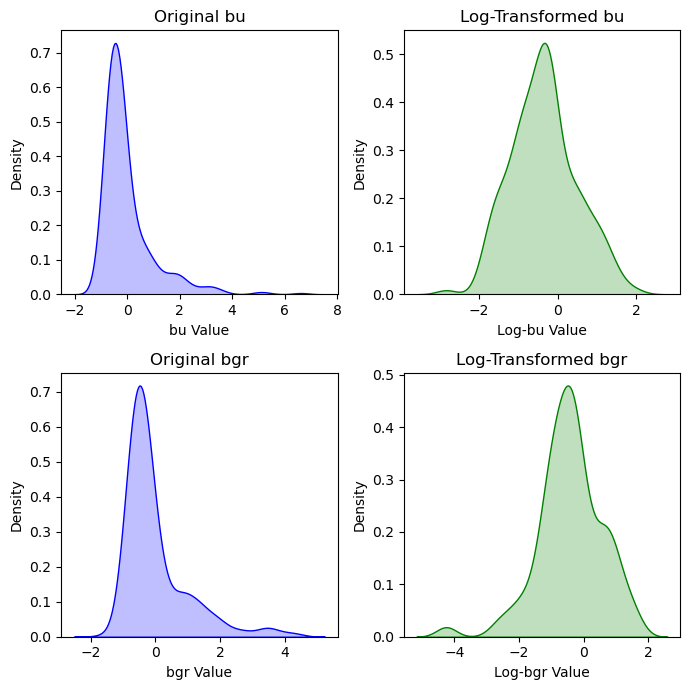

In [14]:
# Create a new DataFrame with selected variables and their transformations
data_log_vis = pd.DataFrame({
    'bu': df['bu'],
    'log_bu': np.log(df['bu'] + 1),  # Log transform with handling zero values
    'bgr': df['bgr'],
    'log_bgr': np.log(df['bgr'] + 1)
})

# Variables to plot
variables = ['bu', 'bgr']

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.flatten()  # Flatten to simplify indexing

for i, var in enumerate(variables):
    # Original Data Plot
    sns.kdeplot(data_log_vis[var], ax=axes[2*i], fill=True, color="blue")
    axes[2*i].set_title(f"Original {var}")
    axes[2*i].set_xlabel(f"{var} Value")
    axes[2*i].set_ylabel("Density")

    # Log-Transformed Data Plot
    sns.kdeplot(data_log_vis[f'log_{var}'], ax=axes[2*i+1], fill=True, color="green")
    axes[2*i+1].set_title(f"Log-Transformed {var}")
    axes[2*i+1].set_xlabel(f"Log-{var} Value")
    axes[2*i+1].set_ylabel("Density")

plt.tight_layout()
plt.show()


Observations:
1. The dataset has an imbalance in the number of kidney disease positive vs negative examples. Our visual exploratory data analysis also revealed that there are two mislabeled variables in the dataset's target column. The column in the dataset should include only "positive" or "negative" Kidney disease status, but there were a few examples with a third label. We discuss this more in the outliers section.
2. Many of the variables look roughly noramlly distributed, except that the blood glucode random and blood urea features are long-tailed. This has implications for feature engineering: we expect that log-transforming these features will make them closer to a normal distribution; this is likely to improve performance on classifiers such as logistic regression. We visualized these variables log-transformed to confirm that they look closer to a normal distribution after the transformation
3. Most variables are continuous, although the specific gravity, albumin and sugar levels are categorical.

In this stage of exploratory data analysis, we are unsure whether we will end up using the log-transformed variables. This will depend on our results we obtain later.

4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,-0.181683,-0.209743,0.169865,0.065425,0.244992,...,-0.242119,0.118339,-0.268896,0.389724,0.354065,0.221807,0.148648,0.085726,0.041271,-0.222361
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,-0.194643,-0.129873,0.074018,0.126518,0.160193,...,-0.326319,0.029753,-0.261936,0.277324,0.235513,0.098398,0.184732,0.062676,0.204279,-0.297019
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,0.421101,0.299093,-0.290210,-0.220317,-0.374710,...,0.603560,-0.236215,0.579476,-0.410243,-0.436692,-0.195717,-0.268856,-0.298504,-0.243082,0.729117
al,0.122091,0.160689,-0.469760,1.000000,0.269305,-0.110803,-0.375461,0.403257,0.366845,0.379464,...,-0.611891,0.231989,-0.566437,0.525234,0.406456,0.272713,0.359009,0.477127,0.322958,-0.625585
su,0.220866,0.222576,-0.296234,0.269305,1.000000,-0.187230,-0.221037,0.156997,0.115534,0.717827,...,-0.239189,0.184893,-0.237448,0.321166,0.500133,0.276542,0.089770,0.144712,0.077908,-0.345589
rbc,-0.181683,-0.194643,0.421101,-0.110803,-0.187230,1.000000,0.393821,0.002845,0.019199,-0.193079,...,0.350038,0.029804,0.339400,-0.321229,-0.345661,-0.129224,-0.190258,-0.143371,-0.135308,0.630148
pc,-0.209743,-0.129873,0.299093,-0.375461,-0.221037,0.393821,1.000000,-0.136040,-0.088435,-0.175899,...,0.391230,-0.079035,0.390282,-0.344689,-0.345482,-0.154193,-0.172015,-0.244199,-0.233601,0.397401
pcc,0.169865,0.074018,-0.290210,0.403257,0.156997,0.002845,-0.136040,1.000000,0.376102,0.215386,...,-0.326328,0.184171,-0.371968,0.206843,0.173907,0.184861,0.193949,0.113742,0.178299,-0.283455
ba,0.065425,0.126518,-0.220317,0.366845,0.115534,0.019199,-0.088435,0.376102,1.000000,0.109492,...,-0.230173,0.115111,-0.266713,0.111083,0.099610,0.157115,0.155157,0.141271,0.064608,-0.222438
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,-0.193079,-0.175899,0.215386,0.109492,1.000000,...,-0.301385,0.150015,-0.281541,0.391924,0.511183,0.233901,0.186831,0.111331,0.142375,-0.419245


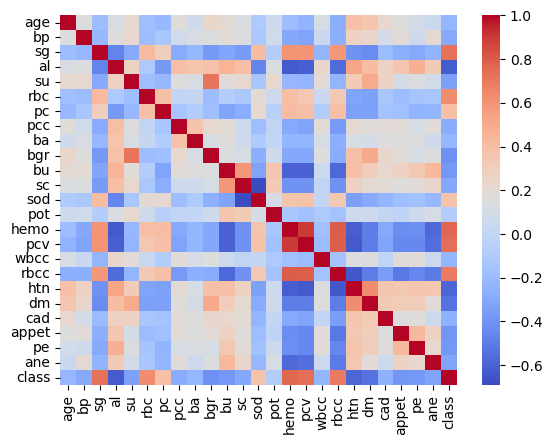

In [15]:
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm')

correlation

Observations:
1. Correlations between the following: White bloodcell count-packed cell volume (Hemo and pcv features), red bloodcell count-hemoglobin (hemo and rbcc features), Packed cell volume-red blood cell count (pcv and rbcc features) have the three highest positive correlations. 
2. Correlations between the following: Serum creatinine and sodium (sc and sod features), Hemoglobin and hypertension (hemo and htn features), Packed cell volume and hypertension (pcv and htn features), Hemoglobin and anemia (hemo and ane features), packed cell volume and anemia (pcv and ane features) have the highest negative correlations.
3. Highly correlated features can lead to overfitting or redundant information. We can get rid of redundant features which leads to simpler models.

5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [16]:
df = df.drop(["pcv"], axis=1)

In [17]:
# Missing Value Analysis
missing_values = df.isnull().sum()

print(missing_values)

age        9
bp        12
sg        47
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64


In [18]:
# Mean imputer for numerical values and most frequent imputer for categorical values
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wbcc', 'rbcc']
cat_vars = ['sg', 'al', 'su']

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_vars] = imputer_num.fit_transform(df[num_vars])
df[cat_vars] = imputer_cat.fit_transform(df[cat_vars])

- For numerical features (age, blood pressure, blood glucose random, blood urea, serum creatinine, sodium, potassium, hemoglobin, packed cell volume, white blood cell count, red blood cell count), we'll use mean imputation. 

- For categorical features (specific gravity, albumin, sugar), we'll use mode imputation. 

- Binary features (red blood cells, pus cell, pus cell clumps, bacteria, hypertension, diabetes mellitus, coronary artery disease, appetite, pedal edema, anemia) already have no missing values.

6. Outlier Analysis: Implement your approach for identifying and managing outliers, or pro- vide reasons for not addressing them.

In [19]:
display(df["dm"].value_counts())
display(df["class"].value_counts())

dm
 1    260
 2    137
-1      2
 0      1
Name: count, dtype: int64

class
0    248
2    150
1      2
Name: count, dtype: int64

In [20]:
# I noticed dm has 1s and 2s, so I converted them to 0s and 1s
# Class has 0s and 2s, so I converted them to 0s and 1s

df['dm'] = df['dm'].replace({2:1, 1:0, -1:0})
# df['dm'] = df['dm'].replace({'2':1, '1':0,})
df['class'] = df['class'].replace({2:1})

In [21]:
display(df["dm"].value_counts())
display(df["class"].value_counts())

dm
0    263
1    137
Name: count, dtype: int64

class
0    248
1    152
Name: count, dtype: int64

We found two errors in the dataset: features which are reported as binary in the data card which have more than two values in the dataset.

We found that for both the target variable and diabetes mellitus, which were each supposed to be binary variables, there were a few examples of additional categories. These additional categories were merged into the most frequent category.

We ran our classification algorithms without any in-depth analysis regarding removal of outliers. Before doing so, we decided that if our classification performance is strong (accuracy above 90%), then we would likely not include any outlier analysis. We did find strong performance, and below is our justification for not removing outliers.

Since both our Random Forest and Logistic Regression classifiers are achieving extremley high accuracy, sensitivity, and specificity without any loss of performance due to the presence of outliers, we believe it's best to keep the outliers in the dataset. Removing them might cause me to lose valuable information and reduce the variability of the data, potentially affecting my ability to generalize to unseen data. Additionally, as Random Forest and Logistic Regression models are quite robust to outliers, we don't think their presence would significantly impact my performance. Also, we are cautious about making decisions regarding outlier removal to avoid introducing bias into the dataset and ensuring that any data manipulation doesn't compromise the integrity of my analysis results. Overall, if removing outliers doesn't lead to noticeable improvements in my performance, we would prefer to stick with the original dataset and keep the outliers intact.

7. Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

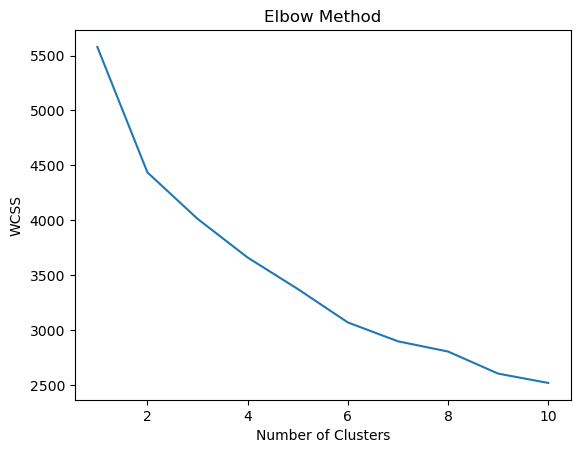

Average Silhouette Score: 0.21162760671350317


In [22]:
# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the number of clusters
num_clusters = 2  # Adjust as needed

kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=0)
kmeans.fit(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Average Silhouette Score:", silhouette_avg)

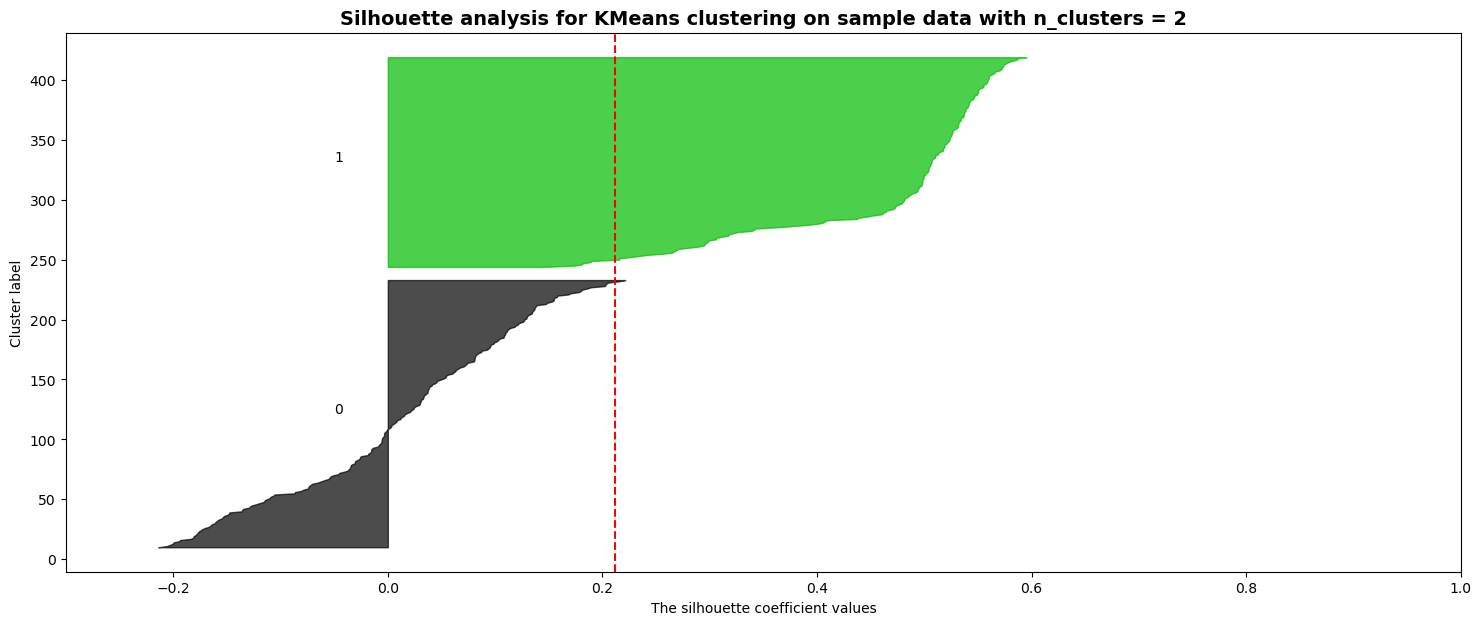

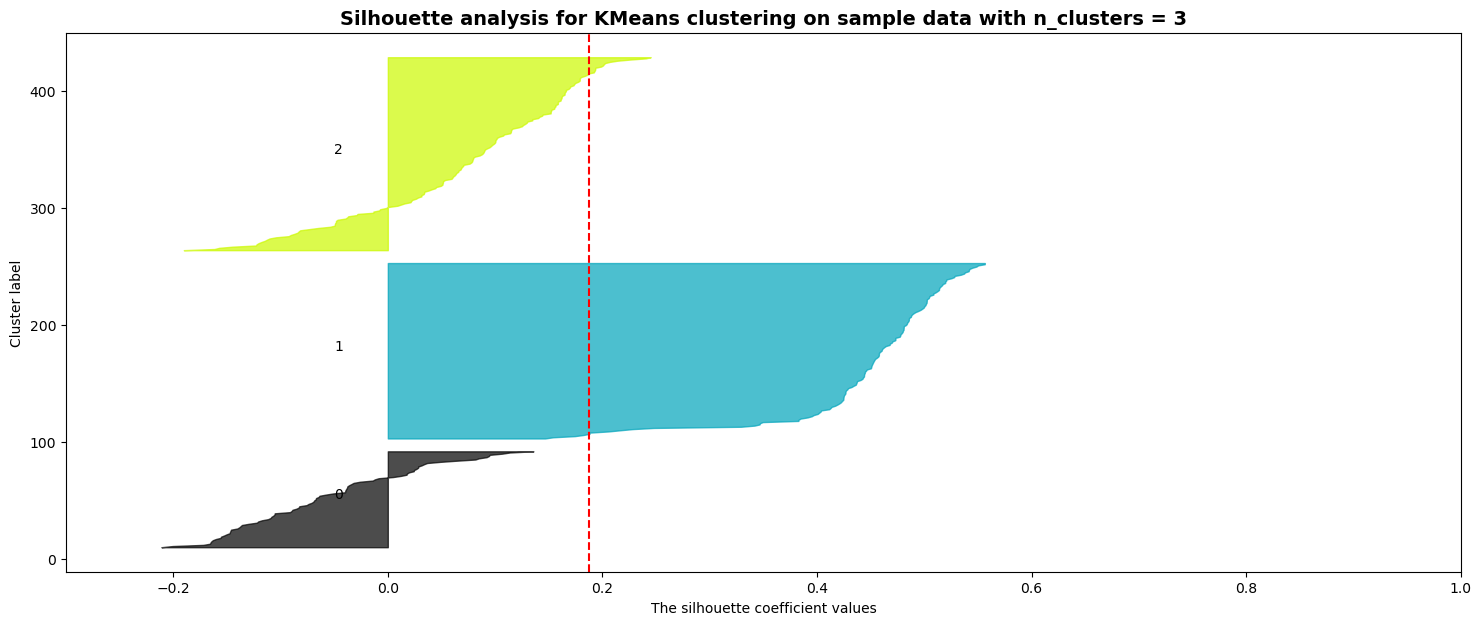

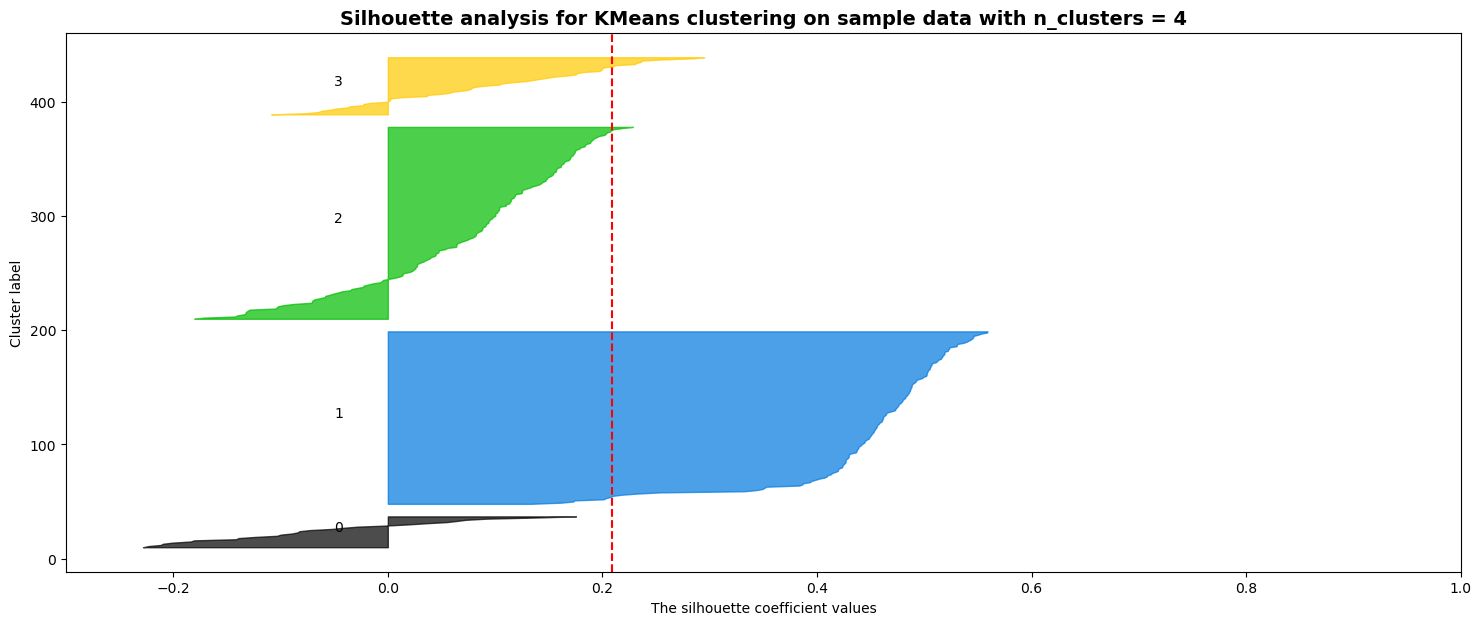

Optimal number of clusters: 2


In [23]:
# Determine optimal number of clusters using silhouette scores
range_n_clusters = [2, 3, 4]
optimal_k = (0,0)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(X)
    # average silhouette score
    silhouette_avg_km = silhouette_score(X, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    optimal_k = (n_clusters,silhouette_avg_km) if optimal_k[1] < silhouette_avg_km else optimal_k

plt.show()
print("Optimal number of clusters:", optimal_k[0])

Number of observations within each cluster:
0    224
1    176
Name: count, dtype: int64
Variances:  [1.97824553 1.23616004 1.07685887 1.03490043 0.9498406  0.92415524
 0.88020906 0.78520753 0.75648553 0.64444749 0.60909821 0.56257017
 0.54068757 0.47359118 0.45735511 0.40608239 0.35604038 0.30341904
 0.2989895  0.28835064 0.26487148 0.23276191 0.20995873]


Text(0, 0.5, 'Variances')

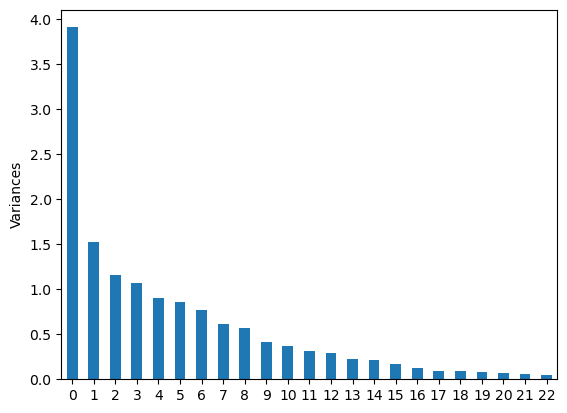

In [24]:
# Apply k-means clustering with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k[0], n_init=20, random_state=0)
kmeans_optimal.fit(X)
cluster_counts = pd.Series(kmeans_optimal.labels_).value_counts().sort_index()
print("Number of observations within each cluster:")
print(cluster_counts)

# Perform PCA
pca = PCA()
df2_plot = pd.DataFrame(pca.fit_transform(X))
print("Variances: ",df2_plot.iloc[:,:].std(axis=0, ddof=0).to_numpy())

df2_plot.iloc[:,:].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

In [25]:
pd.DataFrame([df2_plot.iloc[:,:].std(axis=0, ddof=0).to_numpy(),
              pca.explained_variance_ratio_[:],
              np.cumsum(pca.explained_variance_ratio_[:])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC'+str(i) for i in range(1,24)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard Deviation,1.978246,1.236160,1.076859,1.034900,0.949841,0.924155,0.880209,0.785208,0.756486,0.644447,...,0.473591,0.457355,0.406082,0.356040,0.303419,0.298989,0.288351,0.264871,0.232762,0.209959
Proportion of Variance,0.280628,0.109577,0.083155,0.076801,0.064695,0.061244,0.055558,0.044212,0.041037,0.029781,...,0.016083,0.015000,0.011825,0.009090,0.006602,0.006410,0.005962,0.005031,0.003885,0.003161
Cumulative Proportion,0.280628,0.390206,0.473361,0.550162,0.614857,0.676101,0.731658,0.775870,0.816907,0.846688,...,0.933034,0.948034,0.959859,0.968949,0.975550,0.981961,0.987923,0.992954,0.996839,1.000000


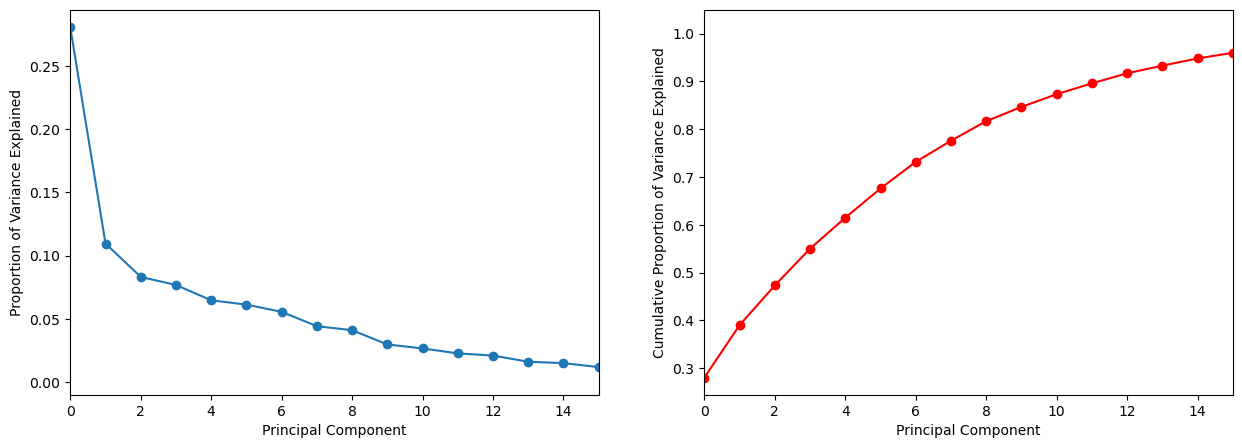

In [26]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(0,15)

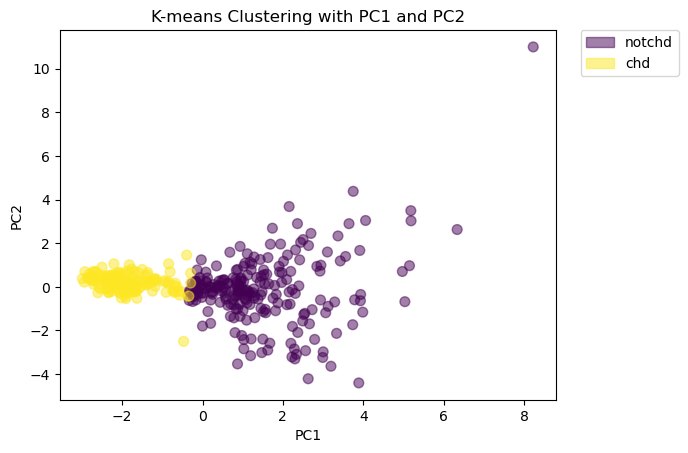

In [27]:
# Visualization of k-means cluster assignments using first two principal components
cmap = plt.cm.viridis

plt.scatter(df2_plot.iloc[:, 0], df2_plot.iloc[:, 1], c=kmeans_optimal.labels_, cmap=cmap, alpha=0.5, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering with PC1 and PC2')
handles = []
labels = pd.factorize(y.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label='chd' if v else 'notchd', alpha=0.5))

plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [28]:
loadings = pd.DataFrame(pca.components_.T, index=['PC'+str(i) for i in range(1,24)], columns=X.columns)
loadings

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,wbcc,rbcc,htn,dm,cad,appet,pe,ane
PC1,0.187481,-0.142848,-0.332067,0.342348,-0.028598,-0.715559,-0.219458,-0.331568,0.109907,0.027187,...,-0.043597,0.067892,-0.079751,0.100833,-0.066553,0.046627,-0.043906,-0.001404,0.007495,0.006461
PC2,0.191835,-0.057524,-0.263973,0.177803,-0.525457,0.477178,-0.572327,-0.009737,0.045376,0.094946,...,0.034375,-0.040312,-0.014420,0.000368,-0.018352,0.043410,0.013664,-0.019749,0.009182,-0.026604
PC3,-0.305444,0.194334,-0.061244,0.324916,-0.001024,-0.046148,-0.122113,0.226060,-0.616412,0.144413,...,0.049865,0.059763,-0.117609,0.017743,0.034566,0.043750,-0.008699,-0.044419,-0.028219,-0.004793
PC4,0.301262,-0.142218,0.419900,-0.296534,-0.048340,-0.035415,-0.086280,-0.301424,-0.160720,0.602451,...,0.148978,0.083357,-0.157675,-0.067963,-0.029987,0.024908,-0.132643,0.072605,0.063058,-0.037407
PC5,0.213803,-0.459014,0.169075,0.371432,0.167873,0.190477,0.047790,0.135095,0.025224,-0.064974,...,-0.230699,0.003757,-0.015715,0.088217,-0.038659,-0.048357,-0.017140,0.065794,-0.063411,-0.004094
PC6,-0.191137,0.055962,0.597954,0.125475,-0.031671,-0.155125,-0.416759,-0.115325,-0.207036,-0.209463,...,-0.146407,0.083281,0.154218,-0.020865,0.003485,0.030371,-0.021470,0.037254,-0.008298,-0.004143
PC7,-0.172196,-0.094542,0.256790,-0.023357,-0.006085,0.093823,-0.200085,-0.306737,0.306594,-0.439248,...,0.069790,0.040516,0.039673,-0.047602,0.034561,0.002685,0.013798,-0.102583,0.001486,0.008888
PC8,0.059672,-0.035402,0.046848,-0.049790,0.000174,-0.045076,-0.035190,-0.046063,-0.030545,0.039591,...,-0.014696,-0.048463,-0.185013,0.181134,0.456935,-0.369714,0.320859,-0.525271,-0.192985,-0.382292
PC9,0.034915,-0.014265,0.036999,-0.035364,-0.017840,-0.005851,-0.031697,-0.030322,-0.017143,0.045988,...,0.020568,-0.022328,-0.100276,0.104359,0.245334,-0.002191,0.204703,-0.191419,-0.078152,0.906472
PC10,0.243771,-0.441432,0.049703,0.239993,0.296319,0.158132,0.091798,0.026811,-0.281345,-0.156975,...,0.238405,0.034489,-0.092476,0.057552,-0.072879,0.068190,0.057304,-0.026568,-0.008316,0.008762


In [29]:
# Identify variable with most significant influence on all PCs
sub_groups = set()
for i in range(0,23):
    most_influential_variable = loadings.iloc[i,:].idxmax()
    print("Variable with most significant influence " + '(PC'+str(i+1)+'):', most_influential_variable)
    sub_groups.add(most_influential_variable)

print("\nSub Groups: ",sub_groups)

Variable with most significant influence (PC1): al
Variable with most significant influence (PC2): rbc
Variable with most significant influence (PC3): bu
Variable with most significant influence (PC4): bgr
Variable with most significant influence (PC5): al
Variable with most significant influence (PC6): sg
Variable with most significant influence (PC7): ba
Variable with most significant influence (PC8): htn
Variable with most significant influence (PC9): ane
Variable with most significant influence (PC10): sc
Variable with most significant influence (PC11): bp
Variable with most significant influence (PC12): hemo
Variable with most significant influence (PC13): hemo
Variable with most significant influence (PC14): bu
Variable with most significant influence (PC15): pot
Variable with most significant influence (PC16): pcc
Variable with most significant influence (PC17): bgr
Variable with most significant influence (PC18): wbcc
Variable with most significant influence (PC19): htn
Variabl

In [30]:
# Compare true labels with k-means cluster assignments
adjusted_rand_index = round(adjusted_rand_score(y, kmeans_optimal.labels_), 2)
rand = rand_score(kmeans_optimal.labels_, y).round(2)
print("Rand Index:", rand)
print("Adjusted Rand Index:", adjusted_rand_index)

Rand Index: 0.87
Adjusted Rand Index: 0.74


8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [31]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

9. Classifier Choices: Identify the two classifiers you have chosen and justify your selections.

In [32]:
# Classifier Choices
rf = RandomForestClassifier()
lr = LogisticRegression()

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Model Evaluation, Presenting Additional Info
rf_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)
lr_pred = lr.predict(X_test)
lr_y_prob = lr.predict_proba(X_test)
probT_rf = pd.DataFrame(
    data = {'prob0': rf_y_prob[:,1], 'y_test': y_test}
    )
probT_lr = pd.DataFrame(
    data = {'prob0': lr_y_prob[:,1], 'y_test': y_test}
    )
probT_rf['y_test_pred'] = probT_rf.prob0.map(lambda x: 1 if x>0.5 else 0)
probT_lr['y_test_pred'] = probT_lr.prob0.map(lambda x: 1 if x>0.5 else 0)

We chose random forest because it is known for not overfitting and being able to handle multi dimensional data. It also works well when there is both numerical and catagorical data which we have in this case. Random forests are similar to the decision trees we learned about in class, but they use bootstrapping and random feature selection to make predictions more robust. A random forest is a collection of decision trees which are generated using bootstrapping. Each decision tree is trained on a random subset of the data and a random subset of features. During prediction, the results from all trees are majority-voted for classification to determine the predicted class

We chose logistic regression because it is relativley simple and easy to interpret.

10. Performance Metrics: Outline the two metrics for comparing the performance of the classifiers.

In [33]:
# Accuracy, Sensitivity, Specificity
def evaluate(y_test, y_test_pred):
    cm = confusion_matrix(y_test,y_test_pred)
    print('Confusion Matrix : \n', cm)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    print ('Accuracy : ', accuracy)
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)
    print(classification_report(y_test, y_test_pred, zero_division=0.0))



Accuracy, sensitivity, and specificity are essential metrics derived from the confusion matrix used to evaluate the performance of classification models. Accuracy measures the overall correctness of the model's predictions by calculating the ratio of correctly predicted observations to the total observations in the dataset. Sensitivity, also known as recall or true positive rate, assesses the model's ability to correctly identify positive cases, calculated as the proportion of true positives to the sum of true positives and false negatives. Specificity evaluates the model's capacity to correctly identify negative cases, represented as the ratio of true negatives to the sum of true negatives and false positives. These metrics provide valuable insights into different aspects of the classifiers's behavior, helping to compare classifiers.

11. Feature Selection/Extraction: Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

In [34]:
# Feature selection using Backward selection (called Recursive Feature Elimination (RFE) in sklearn)
from sklearn.feature_selection import RFE

rfe_selector = RFE(lr, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)
selected_features_rfe = X_train.columns[rfe_selector.support_]

In [35]:
print("Selected Features Using Backward Selection")
print(selected_features_rfe.to_list())

Selected Features Using Backward Selection
['bp', 'sg', 'al', 'su', 'rbc', 'bgr', 'sc', 'sod', 'hemo', 'pe']


12. Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

Using all the features

In [36]:
# Classifier Choices and Instantiation
rf = RandomForestClassifier()
lr = LogisticRegression()

# Fit models to training data
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Model Evaluation
rf_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)
lr_pred = lr.predict(X_test)
lr_y_prob = lr.predict_proba(X_test)
probT_rf = pd.DataFrame(
    data = {'prob0': rf_y_prob[:,1], 'y_test': y_test}
    )
probT_lr = pd.DataFrame(
    data = {'prob0': lr_y_prob[:,1], 'y_test': y_test}
    )
probT_rf['y_test_pred'] = probT_rf.prob0.map(lambda x: 1 if x>0.5 else 0)
probT_lr['y_test_pred'] = probT_lr.prob0.map(lambda x: 1 if x>0.5 else 0)

print('Random Forest Classifier:\n')
evaluate(probT_rf.y_test, y_pred_rf)

print('Logistic Regression Classifier:\n')
evaluate(probT_lr.y_test, y_pred_lr)

Random Forest Classifier:



NameError: name 'y_pred_rf' is not defined

Now using the selected features

In [ ]:
# Classifier Choices and Instantiation
rf2 = RandomForestClassifier()
lr2 = LogisticRegression()

# Fit models to training data
rf2.fit(X_train[selected_features_rfe], y_train)
lr2.fit(X_train[selected_features_rfe], y_train)

# Model Evaluation
rf_pred = rf2.predict(X_test[selected_features_rfe])
rf_y_prob = rf2.predict_proba(X_test[selected_features_rfe])
lr_pred = lr2.predict(X_test[selected_features_rfe])
lr_y_prob = lr2.predict_proba(X_test[selected_features_rfe])
probT_rf = pd.DataFrame(
    data={'prob0': rf_y_prob[:, 1], 'y_test': y_test}
)
probT_lr = pd.DataFrame(
    data={'prob0': lr_y_prob[:, 1], 'y_test': y_test}
)
probT_rf['y_test_pred'] = probT_rf.prob0.map(lambda x: 1 if x > 0.5 else 0)
probT_lr['y_test_pred'] = probT_lr.prob0.map(lambda x: 1 if x > 0.5 else 0)

print('Random Forest Classifier:\n')
evaluate(probT_rf.y_test, y_pred_rf)

print('Logistic Regression Classifier:\n')
evaluate(probT_lr.y_test, y_pred_lr)


Random Forest Classifier:

Confusion Matrix : 
 [[70  0]
 [ 0 50]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Logistic Regression Classifier:

Confusion Matrix : 
 [[70  0]
 [ 0 50]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
print('Random Forest Classifier:\n')
evaluate(probT_rf.y_test, y_pred_rf)

print('Logistic Regression Classifier:\n')
evaluate(probT_lr.y_test, y_pred_lr)

Random Forest Classifier:

Confusion Matrix : 
 [[70  0]
 [ 0 50]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Logistic Regression Classifier:

Confusion Matrix : 
 [[70  0]
 [ 0 50]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



13. Interpretable Classifier Insight: After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

In [ ]:
# retrain Logistic regression on whole dataset:
lr = LogisticRegression()
lr.fit(X[selected_features_rfe], y)

# Interpret Logistic Regression coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X_train[selected_features_rfe].columns)
coefficients_transposed = coefficients.transpose()
coefficients_transposed.columns = ['Coefficient']
coefficients_transposed = coefficients_transposed.assign(Abs_Coefficient=abs(coefficients_transposed['Coefficient']))
coefficients_transposed = coefficients_transposed.sort_values(by='Abs_Coefficient', ascending=False)
coefficients_transposed = coefficients_transposed.drop('Abs_Coefficient', axis=1)
print("Interpretable Classifier Insight:")
print(coefficients_transposed.head(10))


Interpretable Classifier Insight:
      Coefficient
hemo     2.010680
al      -1.849457
rbc      1.796728
pe      -1.080013
sg       1.055752
sod      0.897158
sc      -0.852279
bgr     -0.674604
bp      -0.587153
su      -0.490523


For logistic regression, the value and the sign of the predictor variables are important in interpreting the results. In order to best interpret the results, we will first provide a brief overview of how to interpret them, and then point to a specific example and highlight what conclusions we may draw from our interpretation of it. 

A positive coefficient for a given predictor variable implies a positive relationship between that variable and the outcome: when predictor variable increases so does the outcome. Similarly, negative implies a negative relationship. The particular value of a variable's coefficient indicates how strongly the predictor affects the outcome. A higher magnitude indicates that this variable implies a higher probility of either a positive or negative outcome (depending on the sign). Additionally, in logistic regression, we can use p-values to show whether each predictor varaible is statistically significant. The p-value in logistic regression comes from a hypothesis test, where the null hypothesis is that the true slope of the varible's coefficient is 0. This null hypothesis holds that changing the variable has no impact on the probability of a patient having kidney disease. The lower the p-value, the more likely the variable is to not be zero and be useful in predicting the outcome.

In this case, for example, the albumin predictor (al feature) has a coefficient -1.761526. This means that if patient albumin levels increases by one unit then the log-odds of the person having CKD decreases (since sign is negative) by -1.761526. 

From an interpretability perspective this highlights that our logistic regression model predicts that as a patient's levels of albumin decrease, the risk of the kidney disease becomes higher. Low Albumin is an established marker for kidney damage within the biomedial literature (@ChengTong2023Tlos). We take it as a promising sign that our model identified a pattern which is well-established through other means. Similar conclusions can be drawn for other features based on their sign and magnitude

# TEMP WORK START

In [ ]:
X2 = dmatrix(
    'age + bp + sg + al + su + rbc + pc + pcc + ba + bgr + bu + sc + sod + pot + hemo + wbcc + rbcc + dm + cad + appet + pe + ane + htn',
    data=X,
    return_type="dataframe"
) # no pcv or htn
y2 = y

X2 = dmatrix( # using only selected_features_rfe
    'bp + sg + al + su + rbc + bgr + sc + sod + hemo + pe',
    data=X,
    return_type="dataframe"
) # no pcv or htn


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y2, 
    test_size=0.25, 
    random_state=0, 
    stratify=y)

In [ ]:
sm_logit = sm.Logit(y_train2, X_train2).fit()
sm_logit.summary()


         Current function value: 0.020727
         Iterations: 35


/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  300
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.9688
Time:                        19:55:08   Log-Likelihood:                -6.2181
converged:                      False   LL-Null:                       -199.22
Covariance Type:            nonrobust   LLR p-value:                 8.948e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0855   8395.954     -0.002      0.998   -1.65e+04    1.64e+04
bp            -2.7792      1.598     -1.739      0.082      -5.912       0.353
sg             0.1565      0.975      0.161      0.872      -1.754       2.067
al            -1.7842      1.215     -1.469      0.142      -4.165       0.597
su           -22.1663   2.05e+04     -0.001      0.999   -4.01e+04    4.01e+04
rbc            4.8033      2.373      2.024      0.043       0.152       9.454
bgr           -0.1411      3.464     -0.041      0.968      -6.931       6.649
sc           -14.5703     13.247     -1.100      0.271     -40.535      11.394
sod            3.6075      4.861      0.742      0.458      -5.919      13.134
hemo           6.7631      3.870      1.748      0.081      -0.822      14.348
pe            -8.3468     15.509     -0.538      0.590     -38.745      22.051
==============================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:

sm_logit = sm.Logit(y_train2, X_train2).fit(maxiter=100)
sm_logit.summary()


         Current function value: 0.020712
         Iterations: 100


/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  300
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.9688
Time:                        19:56:17   Log-Likelihood:                -6.2136
converged:                      False   LL-Null:                       -199.22
Covariance Type:            nonrobust   LLR p-value:                 8.909e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.4815   1.11e+06  -1.94e-05      1.000   -2.17e+06    2.17e+06
bp            -2.7792      1.599     -1.738      0.082      -5.914       0.356
sg             0.1564      0.975      0.160      0.873      -1.755       2.068
al            -1.7842      1.215     -1.468      0.142      -4.166       0.598
su           -32.8852    2.7e+06  -1.22e-05      1.000    -5.3e+06     5.3e+06
rbc            4.8033      2.374      2.023      0.043       0.151       9.456
bgr           -0.1412      3.470     -0.041      0.968      -6.942       6.660
sc           -14.5706     13.262     -1.099      0.272     -40.564      11.422
sod            3.6075      4.861      0.742      0.458      -5.920      13.135
hemo           6.7632      3.873      1.746      0.081      -0.827      14.353
pe           -54.9489   1.98e+11  -2.77e-10      1.000   -3.88e+11    3.88e+11
==============================================================================

Possibly complete quasi-separation: A fraction 0.78 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:


evaluate(y_test2, round(y_hat))

Confusion Matrix : 
 [[60  2]
 [ 1 37]]
Accuracy :  0.97
Sensitivity :  0.967741935483871
Specificity :  0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.95      0.97      0.96        38

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
# retrain Logistic regression on whole dataset:
lr = LogisticRegression()
lr.fit(X[selected_features_rfe], y)

# Interpret Logistic Regression coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X_train[selected_features_rfe].columns)
coefficients_transposed = coefficients.transpose()
coefficients_transposed.columns = ['Coefficient']
coefficients_transposed = coefficients_transposed.assign(Abs_Coefficient=abs(coefficients_transposed['Coefficient']))
coefficients_transposed = coefficients_transposed.sort_values(by='Abs_Coefficient', ascending=False)
coefficients_transposed = coefficients_transposed.drop('Abs_Coefficient', axis=1)
print("Interpretable Classifier Insight:")
print(coefficients_transposed.head(10))


Interpretable Classifier Insight:
      Coefficient
hemo     2.010680
al      -1.849457
rbc      1.796728
pe      -1.080013
sg       1.055752
sod      0.897158
sc      -0.852279
bgr     -0.674604
bp      -0.587153
su      -0.490523


# TEMP WORK END

14. Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

# Contributions

Jenna: 
- Created/set up repository and jupyter notebook
- started working on questions 1-4
- started working on 11,
- made general edits
- q11-13 with Noah

Viransh: 
- References added,
- done questions 5-10

Noah:
- Finished question 3,
- added visualizations and discussion of normality/log-transformation, 
- added writing and detail for questions 1, 2 and 4
- q11-13 with Jenna
- Proofread and edited all writing in final stages

# Github Link

[Github link] (https://github.com/JennaOrvitz/Stats3DA3FinalProject/tree/main)

## References

::: {#refs}
:::